In [ ]:
jiimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big-Mart-sales prediction/train.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.shape

(8523, 12)

In [ ]:
# getting categorical and numerical columns
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [ ]:
for col in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  vals = df[col].unique()
  print(f'Unique values/classes in {col} are {vals}\n' )


Unique values/classes in Item_Identifier are ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values/classes in Item_Fat_Content are ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values/classes in Item_Type are ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values/classes in Outlet_Identifier are ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values/classes in Outlet_Size are ['Medium' nan 'High' 'Small']

Unique values/classes in Outlet_Location_Type are ['Tier 1' 'Tier 3' 'Tier 2']

Unique values/classes in Outlet_Type are ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [ ]:
#  value count for categorical col

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# Unique values for categorical columns
for col in cat_cols:
  print('Series: ', col)
  vals = df[col].value_counts()
  print(f'Unique values/classes in {col} are : {vals}' )
  print('\n')

Series:  Item_Identifier
Unique values/classes in Item_Identifier are : FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Series:  Item_Fat_Content
Unique values/classes in Item_Fat_Content are : Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Series:  Item_Type
Unique values/classes in Item_Type are : Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Notes:
- The dataset 8523 contains datapoints (rows) and 12 features (columns).
- The dataset is for 1559 items in 10 different stores.
- There are present categorical (object) and numerical features (float, int).
- he target is the _'Item_OutletSales' feature.
- Some features presents null values and outliers.
- There are no duplicate rows.

 _**ItemIdentifier:**

- Ids for 1559 different items.
- The ids has some prefixes: FD=Food, DR=Drink, NC=Non-Consumable.

 _**ItemWeight:**

- It contains null values.

   _**Item_FatContent:**

- It has 5 different categories, but some of them do reference to an existing category, it can be summarized to two categories: Low Fat and Regular.
- This feature do not apply to Non-Consumable items, a new category for them can be created.

 _**ItemVisibility:**

- Some values are 0%, an item can not be bought by a consumer if its not visible, this is an outlier.

 _**ItemType:**

- There are 16 different item types, the data is not well distributed among all of them.
- The model can be biased towards the most repetitive types: Fruits and Vegetables and Snack Foods.

 _**OutletIdentifier:**

- There are 10 different outlet ids.
- The data seems to be pretty well distributed among all the outlets.

 _**OutletSize:**

- It has null values.
- The data is not well distributed among the different sizes.
- The _OuletSize has some relation with the _OuletType that need to be considered when the null values be filled.

 _**Outlet_Location_Type and OutletType:**

- The data is not well distributed among the different sizes.
- The model can be biased towards the most repetitive types.

In [ ]:
# numerical col of central tendancy check
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

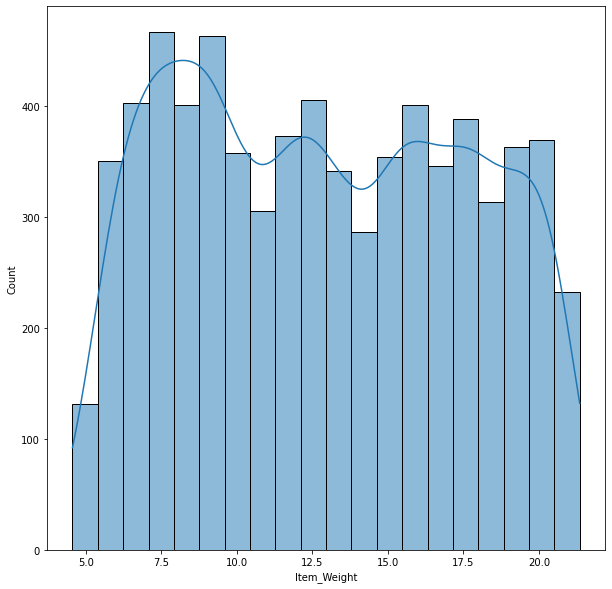

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.histplot(data = df, x='Item_Weight', kde=True)
plt.show()

In [ ]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
(2410+2793+2388+932)

8523

### Missing Values Handaling

In [ ]:

df['Item_Weight'].mean()

12.857645184135976

In [ ]:

# fill null values using the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
#Most repetative value in Out_Size , Mode= maximum reapeated values
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
#Filling null values with maximum repeated values
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Figure out the outlet size in each location and for each type (+ 1 more level)
df.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Medium         1855
                                         Small           930
Tier 3                Grocery Store      Medium          555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
# Figure out the outlet size in each location and for each type (+ 1 more level)
df.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size','Outlet_Identifier','Outlet_Establishment_Year'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier  Outlet_Establishment_Year
Tier 1                Grocery Store      Small        OUT019             1985                         528
                      Supermarket Type1  Medium       OUT049             1999                         930
                                         Small        OUT046             1997                         930
Tier 2                Supermarket Type1  Medium       OUT017             2007                         926
                                                      OUT045             2002                         929
                                         Small        OUT035             2004                         930
Tier 3                Grocery Store      Medium       OUT010             1998                         555
                      Supermarket Type1  High         OUT013             1987                         932
                      Supermarket Type2  Medium      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Univariate analysis

In [ ]:
for col in ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales','Outlet_Establishment_Year']:
  min_val, max_val = df[col].min(), df[col].max()
  # print('Minimum value of ' + col + ' is ' + str(min_val) + ' and Maximum value of ' +   col + ' is ' + str(max_val))
  # print("Minimum value of ", col, " is ", min_val," and Maximum value of ", col," is ",max_val)
  print(f'Minimum value of {col} is {min_val} and Maximum value of {col} is {max_val}')

Minimum value of Item_Weight is 4.555 and Maximum value of Item_Weight is 21.35
Minimum value of Item_Visibility is 0.0 and Maximum value of Item_Visibility is 0.328390948
Minimum value of Item_MRP is 31.29 and Maximum value of Item_MRP is 266.8884
Minimum value of Item_Outlet_Sales is 33.29 and Maximum value of Item_Outlet_Sales is 13086.9648
Minimum value of Outlet_Establishment_Year is 1985 and Maximum value of Outlet_Establishment_Year is 2009


In [ ]:
def get_distro(df,col):
  plt.figure(figsize=(18,6))

  plt.subplot(1,4,1)
  plt.hist(df[col],bins=30)
  plt.title('Hist')
  plt.subplot(1,4,2)
  stats.probplot(df[col],dist='norm',plot=plt)
  plt.ylabel('quantiles')
  plt.subplot(1,4,3)
  sns.boxplot(y=df[col])
  plt.title('Boxplot')
  plt.show()
  plt.subplot(1,4,4)
  sns.distplot(df[col], hist=False)
  plt.show()

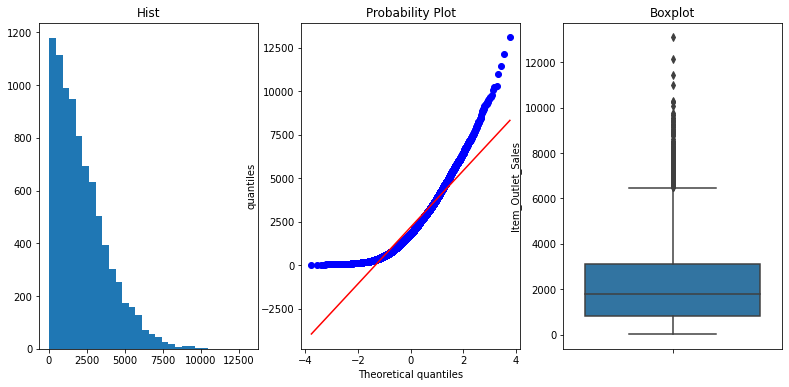

<ipython-input-112-e1c3a1bd5b17>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=False)


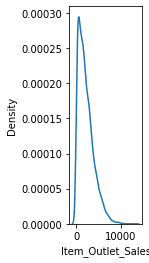

In [ ]:
get_distro(df,'Item_Outlet_Sales')

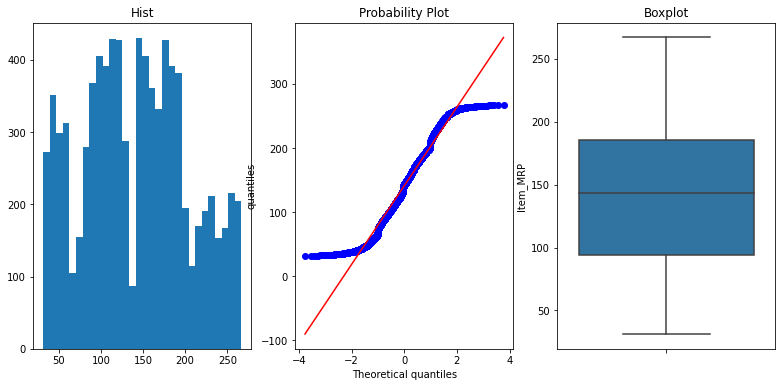

<ipython-input-112-e1c3a1bd5b17>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=False)


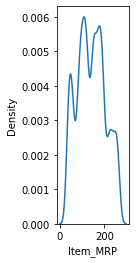

In [ ]:
get_distro(df,'Item_MRP')

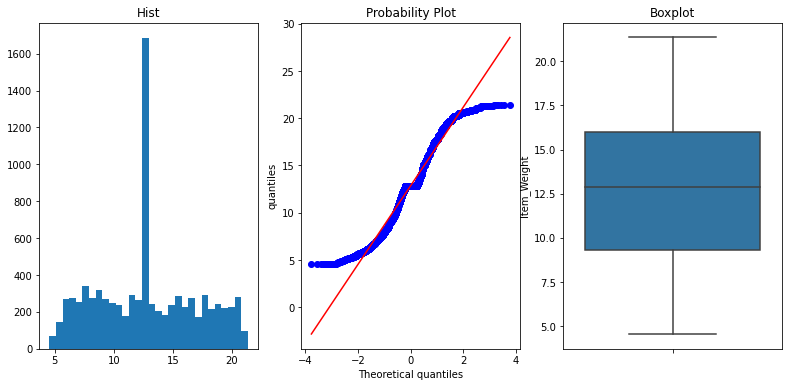

<ipython-input-112-e1c3a1bd5b17>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=False)


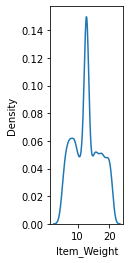

In [ ]:
get_distro(df,'Item_Weight')

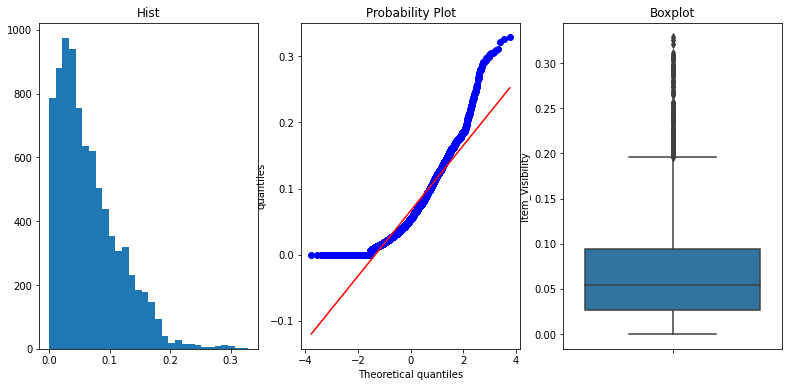

<ipython-input-112-e1c3a1bd5b17>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist=False)


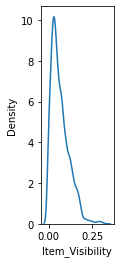

In [ ]:
get_distro(df,'Item_Visibility')

- As demonstrated, Item_Visibility has high skewness to the right
- The skewed data needs to be treated, as the skewness would affect the performance of learaning algorithm
- Normalization would also be applied on the numerical data since it is from the best practices of dealing with numerical features, since normalization ensures that each feature is treated equally when applying supervised learnerning

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

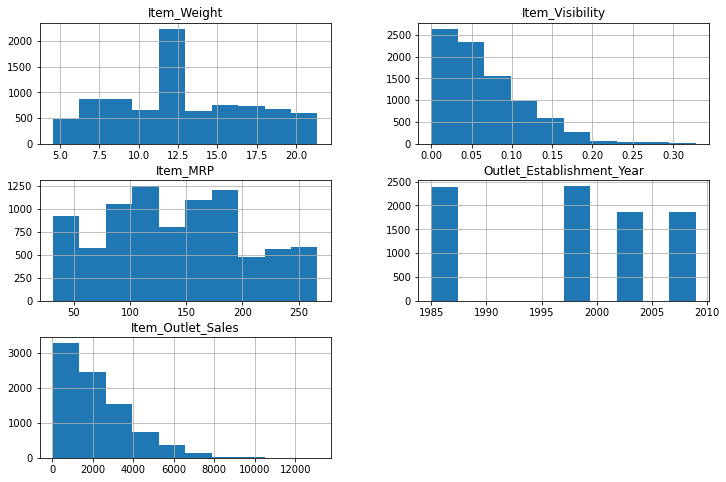

In [ ]:
# data distribution of numerical values
df.hist(figsize=(12,8))

## Bivariate Analysis

In [ ]:
# correlation value varies between -1 and 1
# correlation value between -1 and -0.5 signifies high negative correlation or inverse relationship
# correlation value between -0.5 and 0.5 signifies no correlation
# correlation value between 0.5 and 1 signifies high positive correlation or proportional relationship
# correlation value between -1 and -0.8 signifies high negative correlation or inverse relationship
# correlation value between -0.8 and 0.8 signifies no correlation
# correlation value between 0.8 and 1 signifies high positive correlation or proportional relationship
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

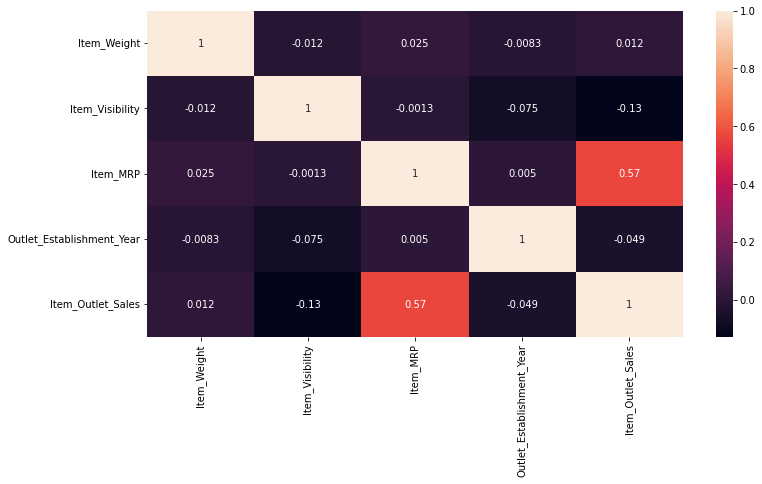

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

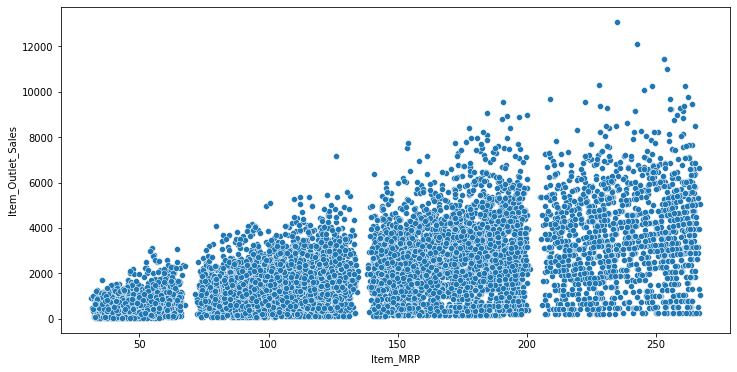

In [ ]:
# scatter plot of item_mrp and item_outlet_sales
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

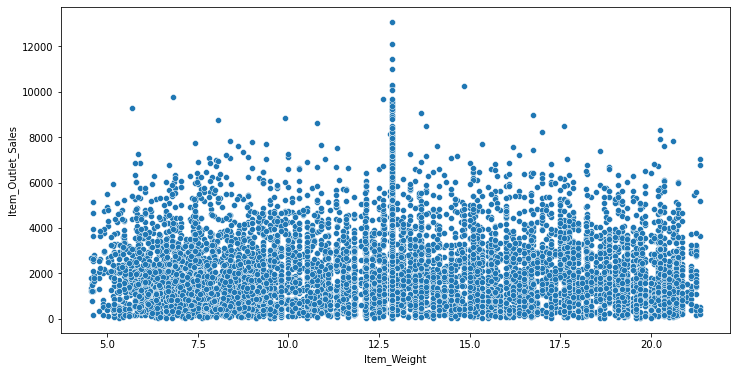

In [ ]:

# scatter plot of Item_Weight and item_outlet_sales
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Item_Weight', y='Item_Outlet_Sales')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

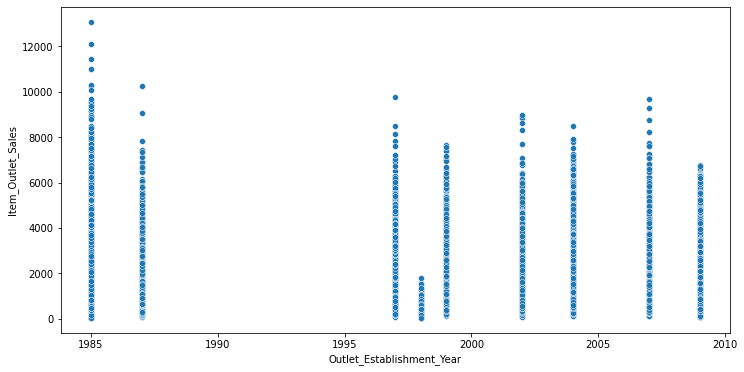

In [ ]:
# scatter plot of outlet_establishment_year and item_outlet_sales
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

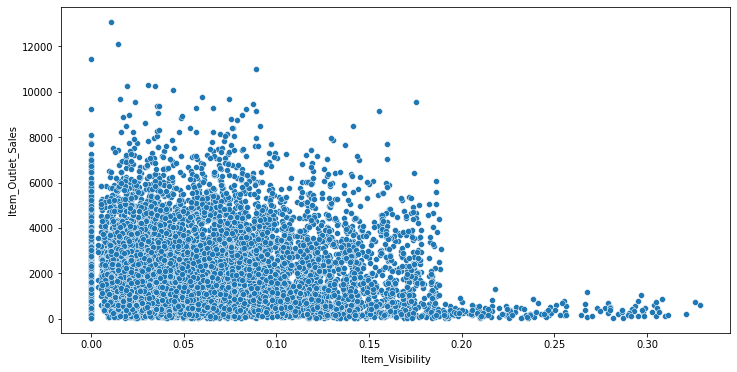

In [ ]:
# scatter plot of  and item_outlet_sales
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')

## Hypothetical Testing

## T- test

In [ ]:
# T-test  for numerical columns, to check the relationship between 2 numercial col.
import statsmodels.api as sm

# Fit a linear regression model
model = sm.OLS(df["Item_Outlet_Sales"], sm.add_constant(df["Item_MRP"])).fit()
# Perform a t-test on the Item_MRP coefficient
t_value = model.tvalues["Item_MRP"]
p_value = model.pvalues["Item_MRP"]
alpha = 0.05  # level of significance , thresold

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant relationship between Item_MRP and sales (p = {:.4f})".format(p_value))
else:
    print("There is no significant relationship between Item_MRP and sales (p = {:.4f})".format(p_value))

There is a significant relationship between Item_MRP and sales (p = 0.0000)


## Anova Test


- The output will give us the F-statistic, degrees of freedom, and p-value for the ANOVA. If the p-value is less than our chosen significance level (e.g., alpha = 0.05), we can conclude that there is a significant difference in sales between at least two of the store types.

In [ ]:
from statsmodels.formula.api import ols

# Fit a one-way ANOVA
model = ols("Item_Outlet_Sales ~ Outlet_Type", df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                   sum_sq      df           F  PR(>F)
Outlet_Type  5.945604e+09     3.0  894.650012     0.0
Residual     1.887166e+10  8519.0         NaN     NaN


## Chi-square test

- The output will give us the chi-square statistic, degrees of freedom, and p-value for the test. If the p-value is less than our chosen significance level (e.g., alpha = 0.05), we can conclude that there is a significant relationship between Outlet_Size and Outlet_Location_Type.

In [ ]:
# Create a contingency table of Outlet_Size and Outlet_Location_Type
cont_table = pd.crosstab(df["Outlet_Size"], df["Outlet_Location_Type"])

# Print the contingency table
print(cont_table)

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930    1855    2418
Small                   1458     930       0


In [ ]:
from scipy.stats import chi2_contingency

# Perform a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)

# Print the test results
print("Chi-square statistic: {:.4f}".format(chi2_stat))
print("p-value: {:.4f}".format(p_value))


Chi-square statistic: 3609.9402
p-value: 0.0000


In [ ]:
# getting categorical col
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# 'Item_Type' categorical feature values count
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

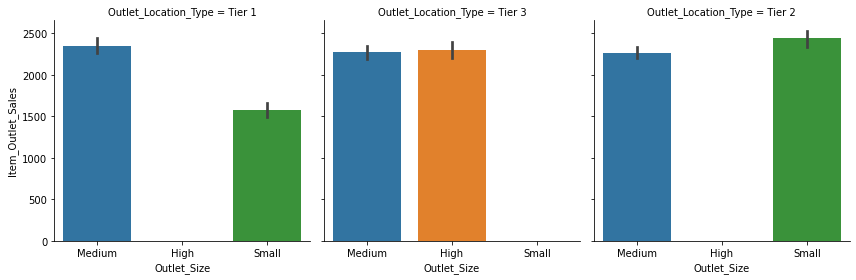

In [ ]:
# Find out the level of sales for each outlet size in different locations
sns.catplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales',\
            col = 'Outlet_Location_Type', kind='bar', aspect=1,\
            height = 4)
plt.show()

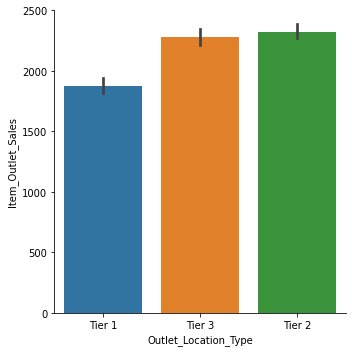

In [ ]:
# The location with the highest sales
sns.catplot(data=df, x = 'Outlet_Location_Type', \
             y = 'Item_Outlet_Sales', kind = 'bar')

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

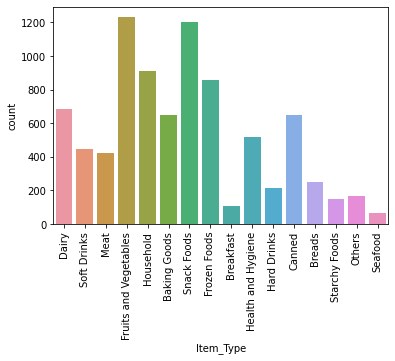

In [ ]:
# plot item_type
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

-  As demonstrated, Tier 2 location has the highest level of sales

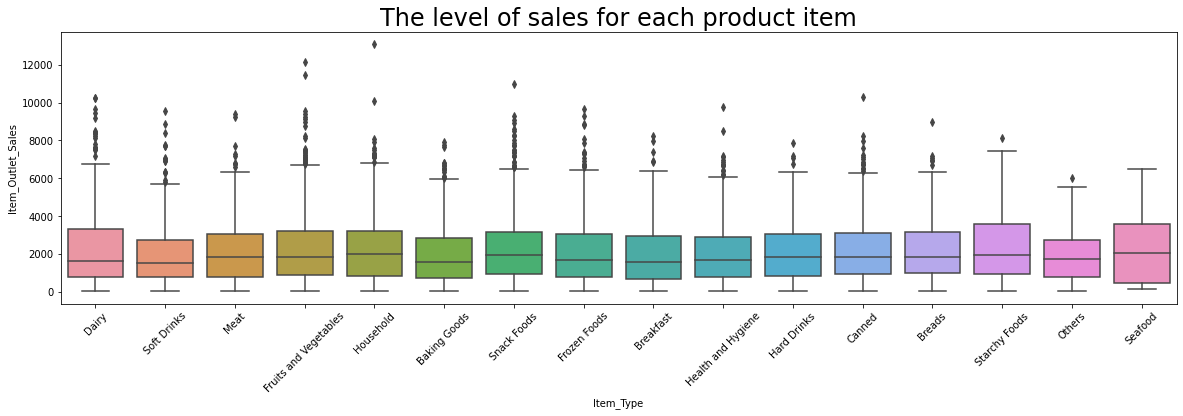

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales')
plt.title('The level of sales for each product item', fontdict={'fontsize':24})
plt.show()

- The median level of sales is approx. the same for all item types, which is around 2000 except for some outlier points that nearly take place in all item types (except seafood)

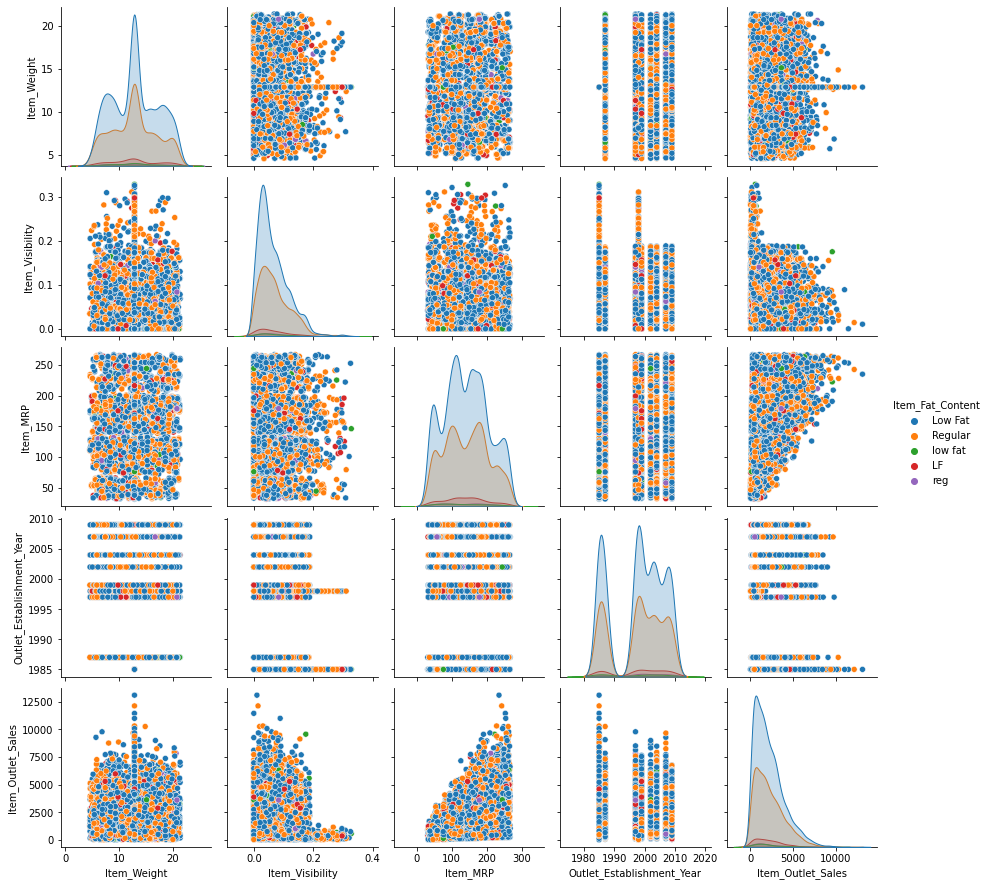

In [ ]:
# Figure out the correlation among variables
sns.pairplot(df, hue='Item_Fat_Content')

- Customers seem to prefere low fat products, since they have higher level ofsales
- Low Fat products tend to have higher maximum retail price than regular content
- There are some items that have zero visibility which may be irrational

In [ ]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# Replacing the 0 values in 'Item_Visibility' to the mean of the column
mean_visibility = df[df['Item_Visibility'] != 0]['Item_Visibility'].mean()
df['Item_Visibility'] = df['Item_Visibility'].replace(0, mean_visibility)

In [ ]:
# getting categorical col
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Log transform the skewed features
skewed = ['Item_Visibility']
df[skewed] = df[skewed].apply(lambda x: np.log(x))


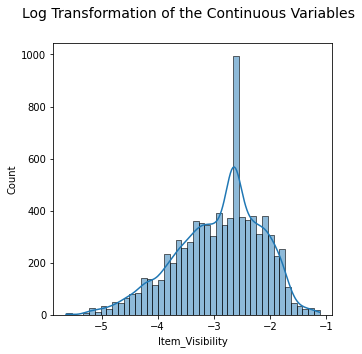

In [ ]:
# Check the result of applying log transf
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.histplot(ax = ax,data = df, x='Item_Visibility', kde=True)
fig.suptitle('Log Transformation of the Continuous Variables', size = 14)
plt.show()

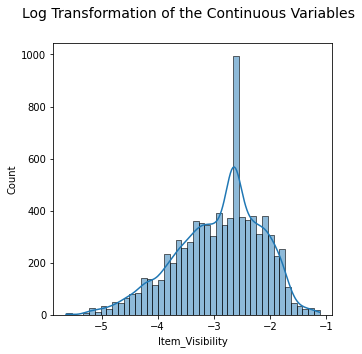

In [ ]:

# Check the result of applying log transf
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.histplot(ax = ax,data = df, x='Item_Visibility', kde=True)
fig.suptitle('Log Transformation of the Continuous Variables', size = 14)
plt.show()


In [ ]:
# Applying normalization to numerical data
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Item_MRP', 'Item_Weight',]
df[numerical]= scaler.fit_transform(df[numerical])

In [ ]:
numerical2 = ['Item_Visibility']
df[numerical2]= scaler.fit_transform(df[numerical2])

## Label Encoding

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [ ]:
df['Item_Identifier']= encoder.fit_transform(df['Item_Identifier'])

In [ ]:
df['Item_Fat_Content']= encoder.fit_transform(df['Item_Fat_Content'])

In [ ]:
df['Item_Type']= encoder.fit_transform(df['Item_Type'])

In [ ]:
df['Outlet_Identifier']= encoder.fit_transform(df['Outlet_Identifier'])

In [ ]:
df['Outlet_Size']= encoder.fit_transform(df['Outlet_Size'])

In [ ]:
df['Outlet_Location_Type']= encoder.fit_transform(df['Outlet_Location_Type'])

In [ ]:
df['Outlet_Type']= encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0.282525,1,0.332202,4,0.927507,9,1999,1,0,1,3735.1380
1,8,0.081274,2,0.372782,14,0.072068,3,2009,1,2,2,443.4228
2,662,0.770765,1,0.341816,10,0.468288,9,1999,1,0,1,2097.2700
3,1121,0.871986,2,0.659571,6,0.640093,0,1998,1,2,0,732.3800
4,1297,0.260494,1,0.659571,9,0.095805,1,1987,0,2,1,994.7052


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Model Building

##### Splitting the data into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=[ 'Outlet_Establishment_Year','Item_Outlet_Sales',"Item_Identifier","Outlet_Identifier"])
y = df['Item_Outlet_Sales']
# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2 )

#### Linear regression

In [ ]:
# Import time to know the duration of training model
from time import time
# Linear regression
from sklearn.linear_model import LinearRegression
start = time()
lin_reg = LinearRegression()  # this is defining model architecture of the simplest model on earth
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_val)

In [ ]:
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(f"R_squared for the validation data is:{lin_reg.score(X_val, y_val)}")
print(f"The mean squared error for the model is:{mean_squared_error(y_val, y_pred)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_pred, y_val)} ")

The duration of training is: 0.05264735221862793
R_squared for the validation data is:0.4911571308110425
The mean squared error for the model is:1570835.953073675 
The mean absolute error for the model is:942.0613172774445 


#### XGB Regression

In [ ]:
# Import XGBRegressor algorithm
from xgboost import XGBRegressor
# Import mean squared and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import  cross_val_score

In [ ]:
# Initiate the model
start = time()
xgb_model = XGBRegressor()

In [ ]:
# Fit the model to our dataset
xgb_model.fit(X_train, y_train)
y_preds = xgb_model.predict(X_val)
end = time()

In [ ]:
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{r2_score(y_val, y_preds)}")
print(f"The mean squared error for the model is:{mean_squared_error(y_val, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_val, y_preds)} ")

The duration of training is: 2.9095349311828613
R_squared for the validation data is:0.5342096480918093
The mean squared error for the model is:1437929.615754363 
The mean absolute error for the model is:840.1303933514666 


### Model Tuning

In [ ]:
# Import 'GridSearchCV', 'make_scorer' libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
reg = XGBRegressor(random_state = 10)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [5, 10, 15],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2, 3]}

# Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# Performing grid search on the regressor using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(reg, parameters, scoring = scorer)

# Fitting the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_

# Making predictions using the unoptimized and optimized model
predictions = (reg.fit(X_train, y_train)).predict(X_val)
best_predictions = best_reg.predict(X_val)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R squared score on testing data: {:.4f}".format(r2_score(y_val, predictions)))
print("Mean Squared Error on testing data: {:.4f}".format(mean_squared_error(y_val, predictions)))
print("\nOptimized Model\n------")
print("Final R squared score on the testing data: {:.4f}".format(r2_score(y_val, best_predictions)))
print("Final F-Mean Squared Error on the testing data: {:.4f}".format(mean_squared_error(y_val, best_predictions)))

Unoptimized model
------
R squared score on testing data: 0.5342
Mean Squared Error on testing data: 1437929.6158

Optimized Model
------
Final R squared score on the testing data: 0.5176
Final F-Mean Squared Error on the testing data: 1489202.9008


- It seems that the unoptimized model is better, but we can add more parameters to test with but since it takes a long time we will use the unoptimized model for the next step

#### Choosing the most important features

<Axes: >

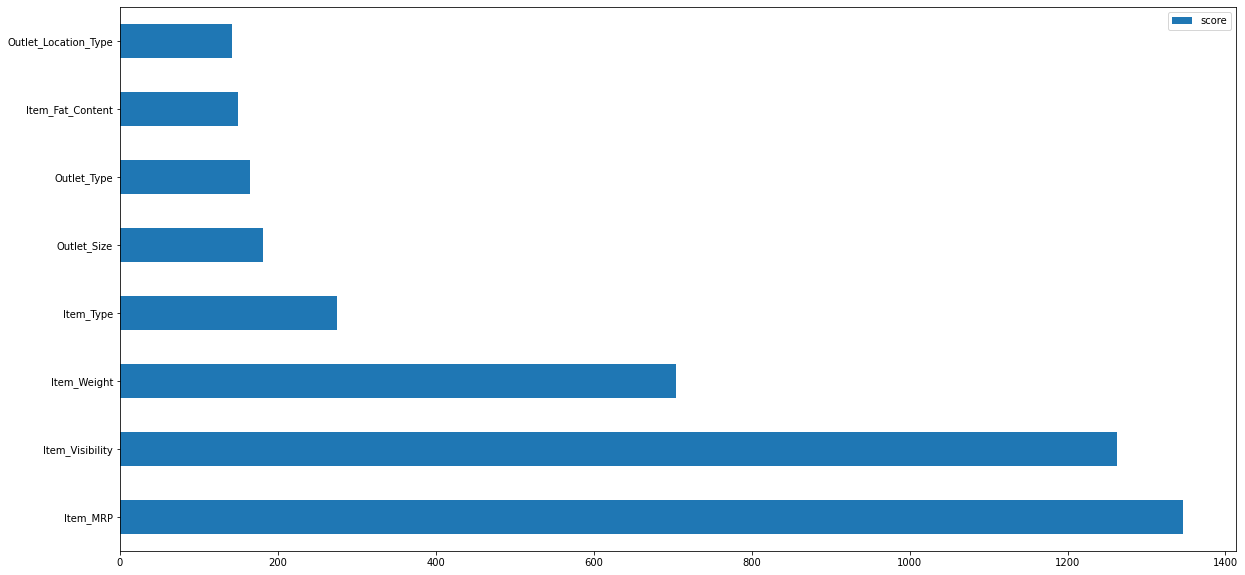

In [ ]:
# Choosing the 10 features with the highest weight to train the model with
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10))